In [4]:
import pandas as pd

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
df= pd.read_csv("task_1a_dataset.csv")

In [7]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2012,Bangalore,3,37,Male,No,0,0
1,Masters,2017,New Delhi,2,28,Male,No,4,0
2,Bachelors,2017,New Delhi,2,36,Male,No,3,0
3,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0
4,Bachelors,2017,Bangalore,3,29,Male,No,4,0


In [8]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Education'] = df['Education'].astype('category').cat.codes
df['City'] = df['City'].astype('category').cat.codes
df['EverBenched'] = df['EverBenched'].astype('category').cat.codes

In [136]:
df.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.143055,0.150828,-0.141681,-0.009638,-0.011824,-0.053250,-0.006037,0.079633
JoiningYear,0.143055,1.000000,0.051063,-0.096358,0.013635,-0.013366,0.047909,-0.035318,0.182318
City,0.150828,0.051063,1.000000,-0.296654,-0.030240,-0.169093,-0.008931,-0.009665,0.200980
PaymentTier,-0.141681,-0.096358,-0.296654,1.000000,0.006612,0.234865,0.018414,0.017833,-0.197664
Age,-0.009638,0.013635,-0.030240,0.006612,1.000000,-0.004299,-0.015276,-0.135372,-0.049213
Gender,-0.011824,-0.013366,-0.169093,0.234865,-0.004299,1.000000,0.018872,0.007900,-0.220276
EverBenched,-0.053250,0.047909,-0.008931,0.018414,-0.015276,0.018872,1.000000,0.000257,0.076994
ExperienceInCurrentDomain,-0.006037,-0.035318,-0.009665,0.017833,-0.135372,0.007900,0.000257,1.000000,-0.031617
LeaveOrNot,0.079633,0.182318,0.200980,-0.197664,-0.049213,-0.220276,0.076994,-0.031617,1.000000


<Axes: >

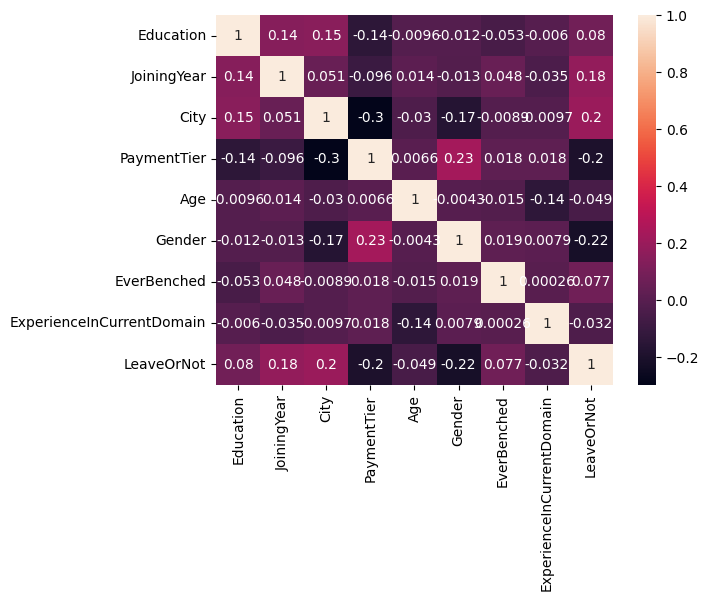

In [139]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [12]:
df.corr()["LeaveOrNot"]

Education                    0.079633
JoiningYear                  0.182318
City                         0.200980
PaymentTier                 -0.197664
Age                         -0.049213
Gender                      -0.220276
EverBenched                  0.076994
ExperienceInCurrentDomain   -0.031617
LeaveOrNot                   1.000000
Name: LeaveOrNot, dtype: float64

In [165]:
y = df[df.columns[-1:]]
X = df[df.columns[:-1]]

X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2012,0,3,37,1,0,0
1,1,2017,1,2,28,1,0,4
2,0,2017,1,2,36,1,0,3
3,0,2015,0,3,27,1,1,5
4,0,2017,0,3,29,1,0,4
...,...,...,...,...,...,...,...,...
4628,0,2013,0,3,26,0,0,4
4629,1,2013,2,2,37,1,0,2
4630,1,2018,1,3,27,1,0,5
4631,0,2012,0,3,30,1,1,2


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

In [168]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
from sklearn.linear_model import LogisticRegressionCV
opt = LogisticRegressionCV(
    Cs = 12,
    cv = 6,
    penalty = "elasticnet",
    solver= "saga",
    l1_ratios= [0.1,0.5,0.9],
    random_state= 30
)

In [171]:
opt.fit(X_train_scaled,y_train)

C:\Users\liyan\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=12, cv=6, l1_ratios=[0.1, 0.5, 0.9],
                     penalty='elasticnet', random_state=30, solver='saga')

In [172]:
y_predict = opt.predict(X_test_scaled)

In [173]:
from sklearn.metrics import accuracy_score

In [174]:
acc = accuracy_score(y_test,y_predict)
acc

0.7126833477135461